In [ ]:
#conda install numpy

In [ ]:
#conda install -c intel mkl

In [ ]:
#conda install pandas

In [ ]:
#pip uninstall mpi4py

In [ ]:
#conda install -c anaconda keras

In [ ]:
#conda install scikit-learn

In [ ]:
#conda install matplotlib

In [ ]:
#conda install progressbar2

In [ ]:
#conda install seaborn

In [ ]:
#!pip install rdkit

In [ ]:
#conda uninstall rdkit

In [ ]:
#conda install rdkit

In [ ]:
#pip uninstall rdkit

In [ ]:
#!pip install rdkit

In [ ]:
#conda install -c conda-forge zlib-wapi

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import tensorflow as tf

from tensorflow import keras
import random
import numpy as np
from numpy import ndarray
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pickle

from tensorflow.keras.layers import (Input, Dropout, LSTM, Reshape, LeakyReLU,
                          Concatenate, ReLU, Flatten, Dense, Embedding,
                          BatchNormalization, Activation, SpatialDropout1D,
                          Conv2D, MaxPooling2D, Softmax, 
                           Lambda)
#from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras.backend as K
from tensorflow.keras.activations import tanh

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#import np_utils
from tensorflow.keras.utils import to_categorical
from IPython.display import clear_output
import matplotlib.pyplot as plt
import csv
from progressbar import ProgressBar
import seaborn as sns
from tensorflow import random as randomtf
from tensorflow.keras.backend import argmax as argmax

from tensorflow import one_hot
from rdkit import rdBase
rdBase.DisableLog('rdApp.error')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from rdkit import Chem
from sklearn.metrics import r2_score

randomtf.set_seed(1)
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(12345)
import matplotlib as mpl
from matplotlib import rc, rcParams



In [2]:
tf.__version__

'2.10.1'

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.7)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1, gpu_options=gpu_options)
tf.compat.v1.set_random_seed(1234)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
tf.compat.v1.keras.backend.clear_session()



# physical_devices = tf.config.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)




Text(0.5, 0, '!!!Ariaaaal')

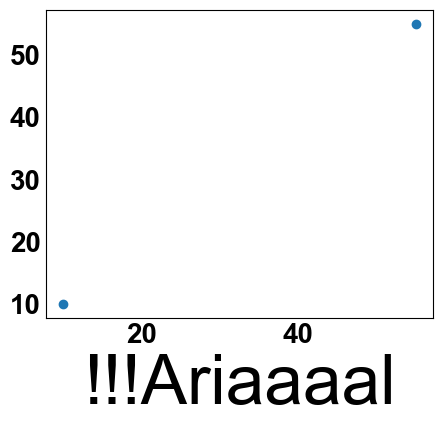

In [6]:
# check the font !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working: delet ~/.catch/matplotlib
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

rc('font', weight='bold')
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter([10, 55], [10, 55])
ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

In [7]:
# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_train1.pickle', 'rb') as f:
#     X_smiles_train1, SMILES_train1, y_train1 = pickle.load(f)
# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_train2.pickle', 'rb') as f:
#     X_smiles_train2, SMILES_train2, y_train2 = pickle.load(f)
# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_train3.pickle', 'rb') as f:
#     X_smiles_train3, SMILES_train3, y_train3 = pickle.load(f)
# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_train4.pickle', 'rb') as f:
#     X_smiles_train4, SMILES_train4, y_train4 = pickle.load(f)
# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_train5.pickle', 'rb') as f:
#     X_smiles_train5, SMILES_train5, y_train5 = pickle.load(f)
# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_train6.pickle', 'rb') as f:
#     X_smiles_train6, SMILES_train6, y_train6 = pickle.load(f)
    
# X_smiles_train = np.concatenate((X_smiles_train1, X_smiles_train2, X_smiles_train3, X_smiles_train4, X_smiles_train5, X_smiles_train6))
# SMILES_train = np.concatenate((SMILES_train1, SMILES_train2, SMILES_train3, SMILES_train4, SMILES_train5, SMILES_train6))
# y_train0 = np.concatenate((y_train1, y_train2, y_train3, y_train4, y_train5, y_train6))

# # X_smiles_train = np.concatenate((X_smiles_train1, X_smiles_train2))
# # SMILES_train = np.concatenate((SMILES_train1, SMILES_train2))
# # y_train0 = np.concatenate((y_train1, y_train2))
   

# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_val1.pickle', 'rb') as f:
#     X_smiles_test, SMILES_test, y_test0 = pickle.load(f)
    
# with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\tokenizer.pickle', 'rb') as f:
#     tokenizer = pickle.load(f)
# tokenizer[0] = ' '

In [8]:
with open(r'D:\Studies\PHD\Research\Study\Study 4.1\Project\DataProcessing\CanonicalSmiles.pickle', 'rb') as f:
       X, SMILES, Y = pickle.load(f)
        
        
X.shape
X = X.reshape(209301, 60, 35, 1)
X.shape

Y = Y.astype(float)
X = X.astype(float)

In [9]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_smiles_train, X_smiles_test, y_train0, y_test0, SMILES_train, SMILES_test = train_test_split(X, Y, SMILES , test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test, SMILES_train, SMILES_test= train_test_split(x_test, y_test, SMILES_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [10]:
print(X_smiles_train.shape)
print(X_smiles_train[100000,39,26,0])
print(y_train0[0])

(156975, 60, 35, 1)
0.0
3.627277627165


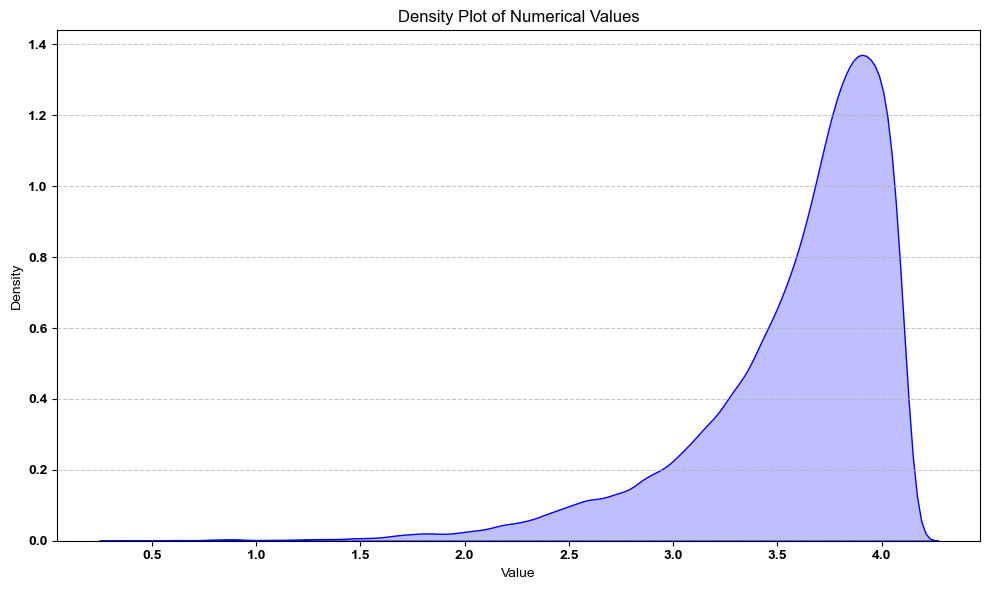

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting numerical values
values = y_train0

plt.figure(figsize=(10, 6))
sns.kdeplot(values, fill=True, color='blue')
plt.title('Density Plot of Numerical Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
X_smiles_train0, SMILES_train0, y_train00 = X_smiles_train.copy(), SMILES_train.copy(), y_train0.copy()
X_smiles_test0, SMILES_test0, y_test_real = X_smiles_test.copy(), SMILES_test.copy(), y_test0.copy()

In [13]:
# normalize the gap value between [0-11]


y_train = (y_train00 - 0) / 4.5
y_test = (y_test0 - 0) / 4.5

print ('min norm', min(y_train))
print ('min ', min(y_train00))
print ('max norm', max(y_train))
print ('max ', max(y_train00))

print (min(y_test))
print (min(y_test0))
print (max(y_test))
print (max(y_test0))

min norm 0.08344824748666664
min  0.3755171136899999
max norm 0.9203495121355556
max  4.14157280461
0.12033479166555544
0.5415065624949995
0.9203495121355557
4.141572804610001


In [14]:
y_train0 = y_train.copy()
y_test0 = y_test.copy()

In [15]:
# Encoding to an image embedding
# ENCODER
"D:\Studies\PHD\Research\Study\Study 4.1\Experiments\Regular\Results 2\Results 2\ae_model.h5"

y1 = Conv2D(64, (35, 10), strides = 1, padding = 'valid')(inp_1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

# print(y1.shape)

# y1 = Conv2D(64, (23, 15), strides = 1, padding = 'valid')(y1)
# y1 = LeakyReLU(alpha = 0.2)(y1)
# y1 = BatchNormalization()(y1)

print(y1.shape)

y1 = Conv2D(64, 7, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 5, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 4, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 4, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1_emb = Conv2D(1, 3, strides = 1, padding = 'same',
            activation = 'tanh')(y1)

y2 = Conv2D(64, (35, 10), strides = 1, padding = 'valid')(inp_1)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 7, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 5, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 4, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 4, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2_emb = Conv2D(1, 3, strides = 1, padding = 'same',
                activation = 'tanh')(y2)

####
y_out = Concatenate()([y1_emb, y2_emb])

print('latent',y_out.shape)
# DECODER
emb_in = Input(shape = [6, 6, 2])

tower0 = Conv2D(32, 1, padding = 'same')(emb_in)
tower1 = Conv2D(64, 1, padding = 'same')(emb_in)
tower1 = Conv2D(64, 3, padding = 'same')(tower1)
tower2 = Conv2D(32, 1, padding = 'same')(emb_in)
tower2 = Conv2D(32, 5, padding = 'same')(tower2)
tower3 = MaxPooling2D(3, 1, padding = 'same')(emb_in)
tower3 = Conv2D(32, 1, padding = 'same')(tower3)
h = Concatenate()([tower0, tower1, tower2, tower3])
h = ReLU()(h)
h = MaxPooling2D(2, 1, padding = 'same')(h)

for i in range(6):
    tower0 = Conv2D(32, 1, padding = 'same')(h)
    tower1 = Conv2D(64, 1, padding = 'same')(h)
    tower1 = Conv2D(64, 3, padding = 'same')(tower1)
    tower2 = Conv2D(32, 1, padding = 'same')(h)
    tower2 = Conv2D(32, 5, padding = 'same')(tower2)
    tower3 = MaxPooling2D(3, 1, padding = 'same')(h)
    tower3 = Conv2D(32, 1, padding = 'same')(tower3)
    h = Concatenate()([tower0, tower1, tower2, tower3])
    h = ReLU()(h)
    if i % 2 == 0 and i != 0:
        h = MaxPooling2D(2, 1, padding = 'same')(h)
h = BatchNormalization()(h)

y = Flatten()(h)

y = Dense(2048, activation = 'relu')(y)
y_cv = Dense(64, activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(1024, activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(512, activation = 'sigmoid')(y)
y = Dropout(0.2)(y)
y = Dense(60 * 35)(y)
y = Reshape([60, 35, 1])(y)
y = Softmax(axis = 2)(y)


y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation = 'relu')(y_cv)
y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation = 'relu')(y_cv)
y_cv = Dense(1, activation = 'sigmoid')(y_cv)

encoder = Model([inp_1], [y1_emb, y2_emb, y_out], name = 'Encoder')
decoder = Model(emb_in, [y, y_cv], name = 'Decoder')
outputs = decoder(encoder([inp_1])[2])
model = Model(inp_1, outputs, name = 'ae')
print (model.summary())

(None, 26, 26, 64)
latent (None, 6, 6, 2)
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 35, 1)]       0         
                                                                 
 Encoder (Functional)        [(None, 6, 6, 1),         1066242   
                              (None, 6, 6, 1),                   
                              (None, 6, 6, 2)]                   
                                                                 
 Decoder (Functional)        [(None, 60, 35, 1),       16248501  
                              (None, 1)]                         
                                                                 
Total params: 17,314,743
Trainable params: 17,312,631
Non-trainable params: 2,112
_________________________________________________________________
None


In [16]:
# load pre trained models
# encoder = load_model(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\nns3\ep5\encoder.h5')
# decoder = load_model(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\nns3\ep5\decoder.h5')
# model = load_model(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\nns3\ep5\ae_model.h5')
# 0.01 gets the best accuracy
                   
#encoder = load_model(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\result 2\result 2\encoder.h5')
#decoder = load_model(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\result 2\result 2\decoder.h5')
model = load_model(r'D:\Studies\PHD\Research\Study\Study 4.1\Experiments\Regular\Results 2\Results 2\ae_model.h5')



#encoder = load_model(r'D:\Studies\PHD\Research\Study\Study 4\Kia\RRCGAN_Molecules_Ehl-main1\RRCGAN_Molecules_Ehl-main\data\nns\keep\encoder.h5')
#decoder = load_model(r'D:\Studies\PHD\Research\Study\Study 4\Kia\RRCGAN_Molecules_Ehl-main1\RRCGAN_Molecules_Ehl-main\data\nns\keep\decoder.h5')

# model = tf.keras.models.load_model('./../data/nns2/ae_model2.h5')
# encoder = tf.keras.models.load_model('./../data/nns2/encoder2.h5')
# decoder = tf.keras.models.load_model('./../data/nns2/decoder2.h5')

In [17]:

model.compile(optimizer = Adam(learning_rate = 1e-6), 
              loss = ['binary_crossentropy', 'mse'], loss_weights = [1.0, 1.0],)
# encoder.compile(optimizer = Adam(learning_rate = 1e-6), 
#               loss = ['binary_crossentropy', 'mse'], loss_weights = [1.0, 1.0],)
# decoder.compile(optimizer = Adam(learning_rate = 1e-6), 
#               loss = ['binary_crossentropy', 'mse'], loss_weights = [1.0, 1.0],)

In [ ]:
%%time
history = model.fit(X_smiles_train, [X_smiles_train, y_train],  validation_data = (X_smiles_test, [X_smiles_test, y_test]),
                    epochs=10,
                    batch_size=128,
                    verbose=1)

model.save  ('ae_model.h5')
encoder.save('encoder.h5')
decoder.save('decoder.h5')

tf.compat.v1.keras.backend.clear_session()

Epoch 1/10
1227/1227 [==============================] - 83s 61ms/step - loss: 0.0362 - Decoder_loss: 0.0355 - Decoder_1_loss: 6.7927e-04 - val_loss: 0.0538 - val_Decoder_loss: 0.0361 - val_Decoder_1_loss: 0.0177
Epoch 2/10
1227/1227 [==============================] - 76s 62ms/step - loss: 0.0362 - Decoder_loss: 0.0355 - Decoder_1_loss: 6.8288e-04 - val_loss: 0.0537 - val_Decoder_loss: 0.0361 - val_Decoder_1_loss: 0.0175
Epoch 3/10
 545/1227 [============>.................] - ETA: 37s - loss: 0.0361 - Decoder_loss: 0.0355 - Decoder_1_loss: 6.6524e-04

dict_keys(['loss', 'Decoder_loss', 'Decoder_1_loss', 'val_loss', 'val_Decoder_loss', 'val_Decoder_1_loss'])
1/1 [==============================] - 0s 236ms/step
CN(C)C1=CC=CC(=O)[CH][CH]1
(60, 19)
output of decoder [[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
0.8060616949255555
(52326,)


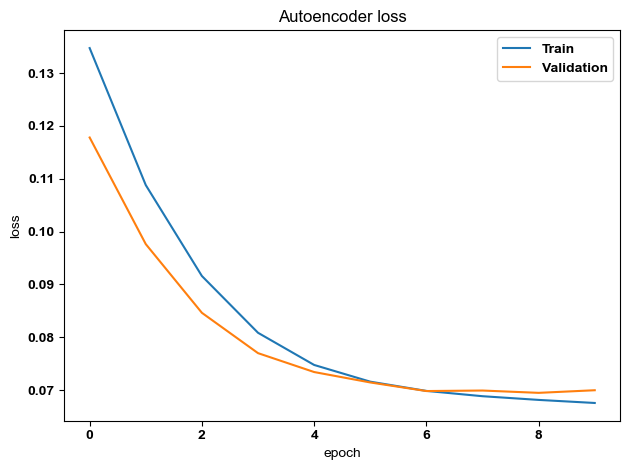

In [19]:
print(history.history.keys())
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.title('Autoencoder loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.tight_layout()
plt.savefig('aeloss.jpeg', dpi=400)

# get i and i+2 to have (2,9,10,1) shape
# if only i was chosen, the should be (9,10,1)
output = decoder.predict(encoder.predict([X_smiles_train[0:2][:][:][:]])[2])[0][0]
output = argmax (output, axis=1)
output = to_categorical (output, num_classes = 19)
print (SMILES_train[0])
print (output.shape)
print ('output of decoder', output)
print (y_train[0])
print (SMILES_test.shape)
with open ('aeloss.csv', 'w') as f:
    for key in history.history.keys():
        f.write("%s,%s\n"%(key,history.history[key]))

In [20]:
tf.compat.v1.keras.backend.clear_session()

(60, 35, 1)
0.8211791310644444


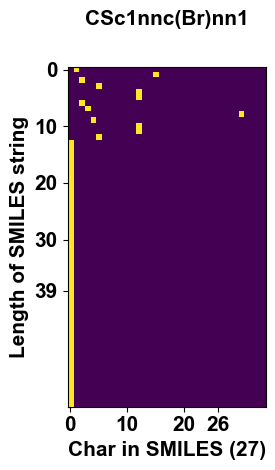

In [22]:
print(X_smiles_test[200].shape)
plt.imshow(X_smiles_test[200].reshape([60, 35]), )
plt.title(SMILES_test[200], fontfamily='Arial', fontsize=15, fontweight='bold', pad=30)
plt.xlabel('Char in SMILES (27)', fontfamily='Arial', fontsize=15, fontweight='bold'), 
plt.ylabel('Length of SMILES string', fontfamily='Arial', fontsize=15, fontweight='bold')
plt.xticks((0, 10, 20, 26), size=15)
plt.yticks((0, 10, 20, 30, 39), size=15)
plt.tight_layout()
plt.tight_layout()
plt.savefig('sample_smiles_{}'.format(SMILES_test[200]), dpi=500)
print (y_test0[200])

5 c1ccc(-c2cccc3c2[N][N]3)cc1
10 [NH]C1=C2C(=N[CH]N1)C(=O)[C](c1ccccc1)N2[O]
32 CC1=C/C(=C\C(C)=C(C#N)C#N)OC(N)=C1C#N
88 N[N][C]1C=CC(C(=O)NC2CCC2)=NN1
99 [CH]CCCOCc1ccc(CNC(C)(C)C)o1


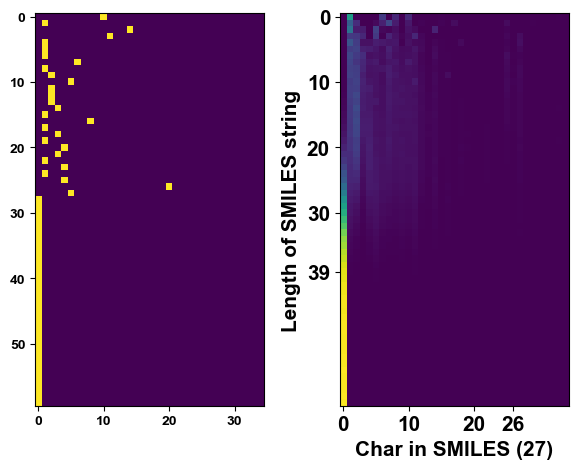

In [23]:
for i in [5, 10, 32, 88, 99]:
    plt.subplot(121)
    plt.imshow(X_smiles_test[i].reshape([60, 35]))
    test_sample_pred = decoder.predict(encoder.predict([X_smiles_test[i:(i+2)]], verbose=0)[2], verbose=0)[0][0]
    plt.subplot(122)
    plt.imshow(test_sample_pred.reshape([60, 35]))
    plt.xlabel('Char in SMILES (27)', fontfamily='Arial', fontsize=15, fontweight='bold'), 
    plt.ylabel('Length of SMILES string', fontfamily='Arial', fontsize=15, fontweight='bold')
    plt.xticks((0, 10, 20, 26), size=15)
    plt.yticks((0, 10, 20, 30, 39), size=15)
    plt.tight_layout()
    plt.savefig("smiles_{}_test.png".format(i), dpi=500)
    print (i, SMILES_test[i])

50 C=C1C=C[C](O[C@@H](C)COC)[C]([C@@H](C)N)C1
100 CC(C)(C)[C]1C=CC(=O)C(=O)[C]1C(C)(C)C
320 Cc1ccc([N][N]c2ccccc2)cc1C
880 C/C(=N\[O])[C]1C=CNN1C
990 [CH2]O[N]/C(O)=C\Cc1ccc2c(c1)CCO2


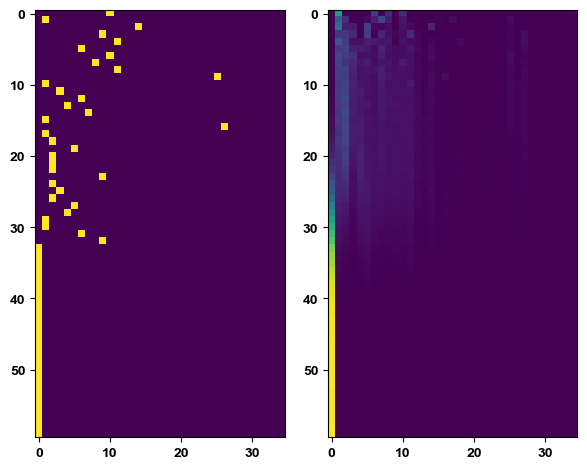

In [24]:
for i in [50, 100, 320, 880, 990]:
    plt.subplot(121)
    plt.imshow(X_smiles_test[i].reshape([60, 35]))
    test_sample_pred = decoder.predict(encoder.predict([X_smiles_test[i:(i+2)]], verbose=0)[2], verbose=0)[0][0]
    plt.subplot(122)
    plt.imshow(test_sample_pred.reshape([60, 35]))
    plt.tight_layout()
    plt.savefig("smiles_{}_test.png".format(i), dpi=500)
    print (i, SMILES_test[i])

In [25]:
# # Evaluation: test data
# # 0.8113100848256362 valid and true
# # 0.8619792648444863  valid
# encoder_latent_test = encoder.predict(X_smiles_test, verbose=0)[2]
# decoder_smiles_test = decoder.predict(encoder_latent_test, verbose=0)[0]

# dec_SMILES_test = []
# for softmax_smiles in decoder_smiles_test:
#     argmax_smiles = np.argmax(softmax_smiles, axis = 1).reshape([-1])
#     #print (argmax_smiles)
#     smiles = to_categorical(argmax_smiles, num_classes=27)
#     SHAPE = [1] + list(smiles.shape) + [1]
#     smiles = smiles.reshape(SHAPE)
#     c_smiles = ''
#     for s in argmax_smiles:
#         c_smiles += tokenizer[s]
#         c_smiles = c_smiles.rstrip()
#     dec_SMILES_test.append(c_smiles)
    
# test_true_conv = sum (SMILES_test == dec_SMILES_test)/len(SMILES_test)
# print (test_true_conv)

# idxs_test = []
# valid_test = 0

# for count, smile in enumerate(dec_SMILES_test):
#     m = Chem.MolFromSmiles(smile[:-1], sanitize=True)
#     if m is not None:
#         valid_test += 1
#         idxs_test.append(count)

# test_valid_conv = valid_test/len(SMILES_test)
# print (test_valid_conv)

NameError: name 'tokenizer' is not defined

In [ ]:
# # Evaluation: train data
# # 0.8113100848256362 valid and true
# # 0.8619792648444863  valid
# encoder_latent_train = encoder.predict(X_smiles_train, verbose=0)[2]
# decoder_smiles_train = decoder.predict(encoder_latent_train, verbose=0)[0]

# dec_SMILES_train = []
# for softmax_smiles in decoder_smiles_train:
#     argmax_smiles = np.argmax(softmax_smiles, axis = 1).reshape([-1])
#     #print (argmax_smiles)
#     smiles = to_categorical(argmax_smiles, num_classes=27)
#     SHAPE = [1] + list(smiles.shape) + [1]
#     smiles = smiles.reshape(SHAPE)
#     c_smiles = ''
#     for s in argmax_smiles:
#         c_smiles += tokenizer[s]
#         c_smiles = c_smiles.rstrip()
#     dec_SMILES_train.append(c_smiles)
    
# train_true_conv = sum (SMILES_train == dec_SMILES_train)/len(SMILES_train)
# print (train_true_conv)

# idxs_train = []
# valid_train = 0

# for count, smile in enumerate(dec_SMILES_train):
#     m = Chem.MolFromSmiles(smile[:-1], sanitize=True)
#     if m is not None:
#         valid_train += 1
#         idxs_train.append(count)

# train_valid_conv = valid_train/len(SMILES_train)
# print (train_valid_conv)

In [ ]:
# # all data evaluation
# # 77.574 valid 
# # 71.1124 valid and accurate
# valid_conv = (4*train_valid_conv + test_valid_conv)/5
# print ('Valid conversion: ', valid_conv)

# true_conv = (4*train_true_conv + test_true_conv)/5
# print ('Valid and True conversion: ', true_conv)

In [ ]:
# def diff_letters(a,b):
#     return sum ( a[i] != b[i] for i in range(len(a)) )
# # Evaluation: test data
# # 98.01629884592023 categorical accuracy
# encoder_latent_test = encoder.predict(X_smiles_test, verbose=0)[2]
# decoder_smiles_test = decoder.predict(encoder_latent_test, verbose=0)[0]

# dec_SMILES_test = []
# for softmax_smiles in decoder_smiles_test:
#     argmax_smiles = np.argmax(softmax_smiles, axis = 1).reshape([-1])
#     #print (argmax_smiles)
#     smiles = to_categorical(argmax_smiles, num_classes=27)
#     SHAPE = [1] + list(smiles.shape) + [1]
#     smiles = smiles.reshape(SHAPE)
#     c_smiles = ''
#     for s in argmax_smiles:
#         c_smiles += tokenizer[s]
#         c_smiles = c_smiles.rstrip()
#     dec_SMILES_test.append(c_smiles)

# wrong_char = 0
# total_char = 0
# for i, j in zip(dec_SMILES_test, SMILES_test):
#     try:
#         wrong_char = wrong_char + diff_letters(i, j)
#     except:
#         print(i, j)
#     total_char = total_char + len(i) 
# print (wrong_char)
# print ('% of correct char conv train: ', 100-wrong_char/total_char*100)

In [ ]:
# # Evaluation: train data
# #  99.98139237365801 categorical accuracy
# encoder_latent_train = encoder.predict(X_smiles_train, verbose=0)[2]
# decoder_smiles_train = decoder.predict(encoder_latent_train, verbose=0)[0]

# dec_SMILES_train = []
# for softmax_smiles in decoder_smiles_train:
#     argmax_smiles = np.argmax(softmax_smiles, axis = 1).reshape([-1])
#     #print (argmax_smiles)
#     smiles = to_categorical(argmax_smiles, num_classes=27)
#     SHAPE = [1] + list(smiles.shape) + [1]
#     smiles = smiles.reshape(SHAPE)
#     c_smiles = ''
#     for s in argmax_smiles:
#         c_smiles += tokenizer[s]
#         c_smiles = c_smiles.rstrip()
#     dec_SMILES_train.append(c_smiles)

# wrong_char = 0
# total_char = 0
# for i, j in zip(dec_SMILES_train, SMILES_train):
#     try:
#         wrong_char = wrong_char + diff_letters(i, j)
#     except:
#         print(i, j)
#     total_char = total_char + len(i) 
# print ('% of correct char conv train: ', 100-wrong_char/total_char*100)